In [1]:
from slackclient import SlackClient
import psycopg2 as pg
import pandas.io.sql as psql
#from datetime import datetime
import datetime
import sys
import json
import copy

print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)
conn_str = "host={0} port={1} dbname={2} user={3} password={4}" \
.format("localhost", 5432, "kanjidb", "postgres", "w0lfpack")

try:
    conn = pg.connect(conn_str)
    print("Welcome to Jupyter Notebook.  You are connected to the Kanji  database!")
except pg.OperationalError:
    print("You are not connected to the database.")

Python version
3.7.2 (default, Dec 29 2018, 06:19:36) 
[GCC 7.3.0]
Version info.
sys.version_info(major=3, minor=7, micro=2, releaselevel='final', serial=0)
Welcome to Jupyter Notebook.  You are connected to the Kanji  database!


In [2]:
query = "SELECT date_trunc('hour', timestamp), COUNT(*) \
         FROM kanji_pinglog \
         WHERE pingstate_id=10001 AND timestamp > NOW() - INTERVAL '168 hours' \
         GROUP BY date_trunc('hour', timestamp) \
         ORDER BY date_trunc('hour', timestamp) desc;"
print(query)
cur = conn.cursor()
cur.execute(query)
rows = cur.fetchall()

#for row in rows:
#    print("{0},{1}".format(row[0],row[1]))

SELECT date_trunc('hour', timestamp), COUNT(*)          FROM kanji_pinglog          WHERE pingstate_id=10001 AND timestamp > NOW() - INTERVAL '168 hours'          GROUP BY date_trunc('hour', timestamp)          ORDER BY date_trunc('hour', timestamp) desc;


In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
import numpy as np

plt.rcParams['figure.figsize'] = [15, 8]


/home/sensei/anaconda3/envs/KanjiBooks/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


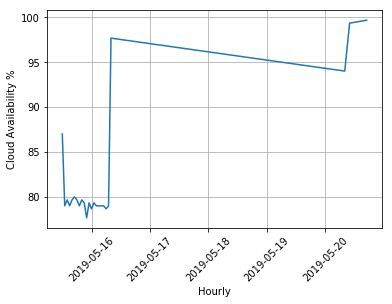

In [4]:
x = np.array([])
y = np.array([])

for row in rows:
    x = np.append(x, row[0])
    y = np.append(y, 100.0 - 100.0*row[1]/300.0)
    
plt.ylabel('Cloud Availability %') 
plt.xlabel('Hourly')
plt.xticks(rotation=45)
plt.grid(True)
plt.plot(x,y)

plt.show()

/home/sensei/anaconda3/envs/KanjiBooks/lib/python3.7/site-packages/pandas/core/sorting.py:257: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  items = np.asanyarray(items)


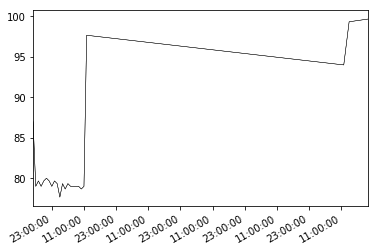

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = pd.Series(y,x)

fig, ax = plt.subplots()
hours = mdates.HourLocator(interval = 12)
h_fmt = mdates.DateFormatter('%H:%M:%S')

# And a corresponding grid
ax.grid(which='both')

ax.plot(df.index, df.values, color = 'black', linewidth = 0.4)
#or use
df.plot(ax = ax, color = 'black', linewidth = 0.4, x_compat=True)
#Then tick and format with matplotlib:
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)

fig.autofmt_xdate()
plt.show()